In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import nltk

In [19]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [20]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from wordcloud import WordCloud

In [21]:
# Download stopwords for text processing
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
# Suppress warnings
warnings.filterwarnings('ignore')

In [23]:
# Load dataset
data_file = 'spam.csv'
encoding_options = ['utf-8', 'latin-1', 'ISO-8859-1']

for encoding in encoding_options:
    try:
        df = pd.read_csv(data_file, encoding=encoding)
        break
    except UnicodeDecodeError:
        continue

In [24]:
# Display the first few rows of the dataframe
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [25]:
# Data cleaning
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)
df['sentiment'] = df['v1'].apply(lambda x: 1 if x == 'ham' else 0)
df.drop(columns=['v1'], inplace=True)

In [26]:
# Data Pre-processing
x = df['v2']
y = df['sentiment']

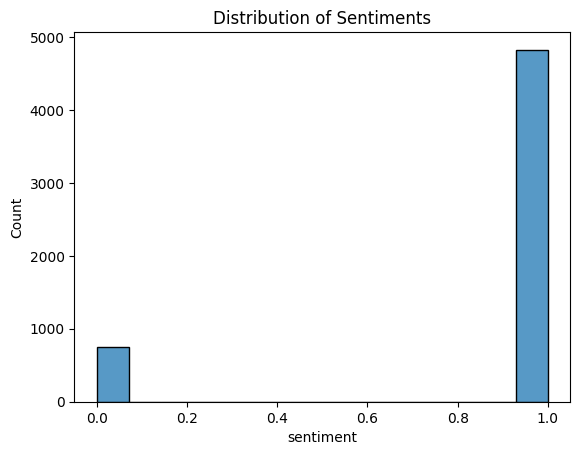

In [27]:
# Plot distribution of sentiments
sns.histplot(y)
plt.title('Distribution of Sentiments')
plt.show()

In [28]:
# Generate and display word cloud
#text = " ".join(sentence for sentence in df['v2'])
#wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)
#plt.figure(figsize=(10, 5))
#plt.imshow(wordcloud, interpolation='bilinear')
#plt.axis('off')
#plt.title('Word Cloud of SMS Messages')
#plt.show()

In [29]:
# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

In [30]:
# Vectorize text data
vectorizer = TfidfVectorizer(sublinear_tf=True, ngram_range=(1, 2), stop_words=stop_words)
x_train_tfidf = vectorizer.fit_transform(x_train)
x_test_tfidf = vectorizer.transform(x_test)

In [31]:
# Model training
models = {
    'SVC (RBF Kernel)': SVC(kernel='rbf'),
    'SVC (Linear Kernel)': SVC(kernel='linear'),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'Bernoulli Naive Bayes': BernoulliNB()
}

SVC (RBF Kernel) Accuracy: 0.9731
              precision    recall  f1-score   support

           0       0.99      0.81      0.89       224
           1       0.97      1.00      0.98      1448

    accuracy                           0.97      1672
   macro avg       0.98      0.90      0.94      1672
weighted avg       0.97      0.97      0.97      1672



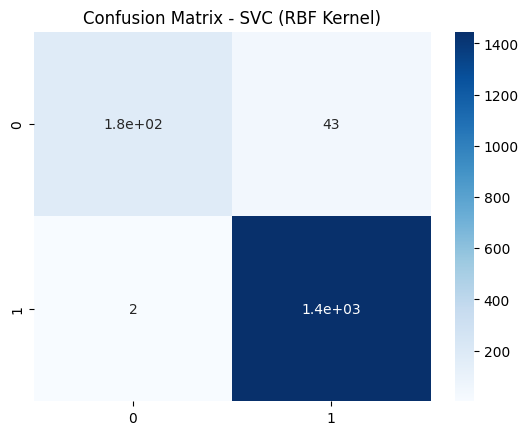

SVC (Linear Kernel) Accuracy: 0.9809
              precision    recall  f1-score   support

           0       0.97      0.89      0.93       224
           1       0.98      1.00      0.99      1448

    accuracy                           0.98      1672
   macro avg       0.97      0.94      0.96      1672
weighted avg       0.98      0.98      0.98      1672



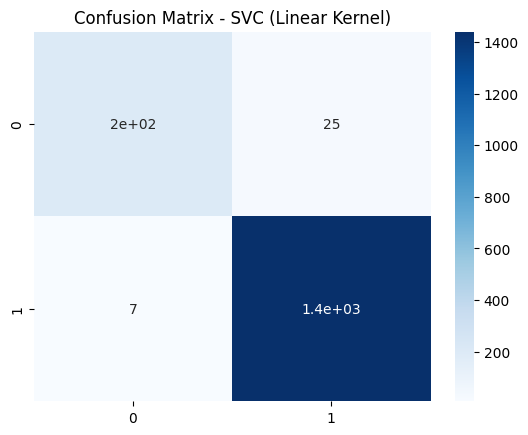

Decision Tree Classifier Accuracy: 0.9533
              precision    recall  f1-score   support

           0       0.91      0.73      0.81       224
           1       0.96      0.99      0.97      1448

    accuracy                           0.95      1672
   macro avg       0.93      0.86      0.89      1672
weighted avg       0.95      0.95      0.95      1672



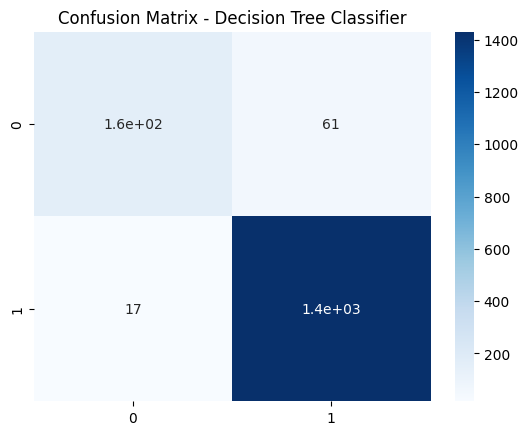

Bernoulli Naive Bayes Accuracy: 0.9318
              precision    recall  f1-score   support

           0       1.00      0.49      0.66       224
           1       0.93      1.00      0.96      1448

    accuracy                           0.93      1672
   macro avg       0.96      0.75      0.81      1672
weighted avg       0.94      0.93      0.92      1672



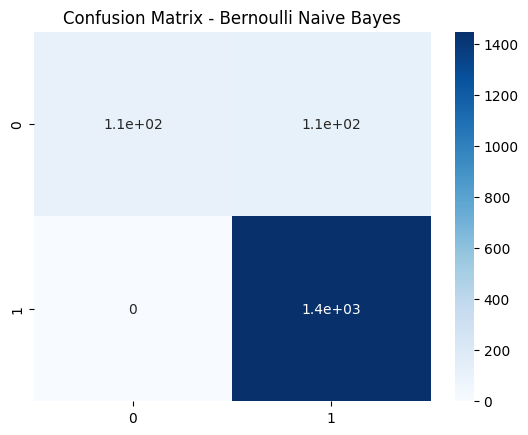

In [32]:
# Train and evaluate models
for model_name, model in models.items():
    model.fit(x_train_tfidf, y_train)
    y_pred = model.predict(x_test_tfidf)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

In [33]:
# Cross-validation
for model_name, model in models.items():
    scores = cross_val_score(model, x_train_tfidf, y_train, cv=5, scoring='accuracy')
    print(f"{model_name} Cross-Validation Scores: {scores}")
    print(f"Mean Accuracy: {scores.mean():.4f}")
    print(f"Standard Deviation of Accuracy: {scores.std():.4f}")
    print('-' * 100)

SVC (RBF Kernel) Cross-Validation Scores: [0.96153846 0.95       0.94102564 0.94871795 0.93717949]
Mean Accuracy: 0.9477
Standard Deviation of Accuracy: 0.0084
----------------------------------------------------------------------------------------------------
SVC (Linear Kernel) Cross-Validation Scores: [0.98333333 0.97948718 0.96794872 0.98076923 0.96923077]
Mean Accuracy: 0.9762
Standard Deviation of Accuracy: 0.0063
----------------------------------------------------------------------------------------------------
Decision Tree Classifier Cross-Validation Scores: [0.96666667 0.96025641 0.96153846 0.97435897 0.96666667]
Mean Accuracy: 0.9659
Standard Deviation of Accuracy: 0.0050
----------------------------------------------------------------------------------------------------
Bernoulli Naive Bayes Cross-Validation Scores: [0.95       0.92692308 0.93589744 0.94102564 0.93205128]
Mean Accuracy: 0.9372
Standard Deviation of Accuracy: 0.0079
-----------------------------------------